In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [2]:
base = 'https://api.coingecko.com/api/v3/'

In [3]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

In [4]:
result = requests.get(url)
j_bc = result.json()

In [5]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc.head(10)

,time,price
0,1635710689232,60797.915285
1,1635714049109,61059.778572
2,1635717755725,61564.920919
3,1635721258788,61472.844726
4,1635725007402,61367.725644
5,1635728421286,61569.098571
6,1635732570710,61331.467774
7,1635735701957,60466.792465
8,1635740145965,59979.030236
9,1635742881666,60742.423166


In [6]:
url = base + 'coins/dogecoin/market_chart'


In [7]:
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}


In [8]:
result = requests.get(url, params=param_dict)


In [9]:
j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1635710747921,0.269643
1,1635714706183,0.273236
2,1635717652246,0.277282
3,1635721385339,0.277804
4,1635725032958,0.279767
5,1635728605113,0.280236
6,1635732585236,0.273735
7,1635735793102,0.269626
8,1635739271056,0.268852
9,1635742837190,0.271257


In [10]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

In [11]:
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2021-10-31 20:04:49.232,60797.915285
2021-10-31 21:00:49.109,61059.778572
2021-10-31 22:02:35.725,61564.920919
2021-10-31 23:00:58.788,61472.844726
2021-11-01 00:03:27.402,61367.725644
2021-11-01 01:00:21.286,61569.098571
2021-11-01 02:09:30.710,61331.467774
2021-11-01 03:01:41.957,60466.792465
2021-11-01 04:15:45.965,59979.030236


In [12]:
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2021-10-31 20:05:47.921,0.269643
2021-10-31 21:11:46.183,0.273236
2021-10-31 22:00:52.246,0.277282
2021-10-31 23:03:05.339,0.277804
2021-11-01 00:03:52.958,0.279767
2021-11-01 01:03:25.113,0.280236
2021-11-01 02:09:45.236,0.273735
2021-11-01 03:03:13.102,0.269626
2021-11-01 04:01:11.056,0.268852


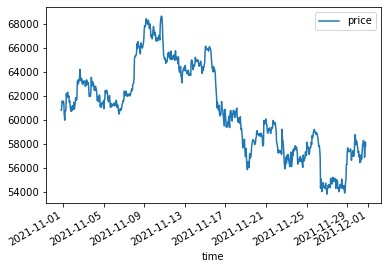

In [14]:
df_bc.plot();

![logo](Dogecoin_logo.png)

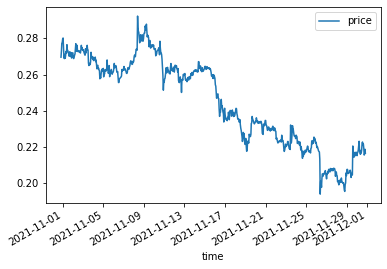

In [15]:
df_dc.plot();

# top ten coins report

In [16]:
url = base + 'coins/list'

In [17]:
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token
5,0-5x-long-bitcoin-sv-token,bsvhalf,0.5X Long Bitcoin SV Token
6,0-5x-long-bitcoin-token,half,0.5X Long Bitcoin Token
7,0-5x-long-cardano-token,adahalf,0.5X Long Cardano Token
8,0-5x-long-chainlink-token,linkhalf,0.5X Long Chainlink Token
9,0-5x-long-cosmos-token,atomhalf,0.5X Long Cosmos Token


In [18]:
data_df = df_list.iloc[:10, 0]
data_df

0                           01coin
1         0-5x-long-algorand-token
2    0-5x-long-altcoin-index-token
3         0-5x-long-balancer-token
4     0-5x-long-bitcoin-cash-token
5       0-5x-long-bitcoin-sv-token
6          0-5x-long-bitcoin-token
7          0-5x-long-cardano-token
8        0-5x-long-chainlink-token
9           0-5x-long-cosmos-token
Name: id, dtype: object

In [19]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_report = pd.concat(data_list)
data_report

,date_time,price,file_name
0,1612396800000,0.002553,01coin
1,1612483200000,0.003833,01coin
2,1612569600000,0.003272,01coin
3,1612656000000,0.003373,01coin
4,1612742400000,0.003425,01coin
...,...,...,...
234,1637366400000,23804.483136,0-5x-long-cosmos-token
235,1637452800000,25345.034909,0-5x-long-cosmos-token
236,1637539200000,25345.034909,0-5x-long-cosmos-token
237,1637623895000,25457.603518,0-5x-long-cosmos-token


In [20]:
data_report = data_report.set_index('date_time')

data_report.head()

,price,file_name
date_time,,
1612396800000,0.002553,01coin
1612483200000,0.003833,01coin
1612569600000,0.003272,01coin
1612656000000,0.003373,01coin
1612742400000,0.003425,01coin


In [21]:
data_report.to_csv('top_ten_report.csv')

In [22]:
check = pd.read_csv('top_ten_report.csv')
check

,date_time,price,file_name
0,1612396800000,0.002553,01coin
1,1612483200000,0.003833,01coin
2,1612569600000,0.003272,01coin
3,1612656000000,0.003373,01coin
4,1612742400000,0.003425,01coin
...,...,...,...
2159,1637366400000,23804.483136,0-5x-long-cosmos-token
2160,1637452800000,25345.034909,0-5x-long-cosmos-token
2161,1637539200000,25345.034909,0-5x-long-cosmos-token
2162,1637623895000,25457.603518,0-5x-long-cosmos-token
